# Chapter 7 - Porosity-band emergence under deformation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from scipy.interpolate import griddata

## The (in)stability of perturbations

Our perturbation will take the form of harmonic plane waves,
\begin{equation}
  \label{eq:shearband-perturbation-prototype}
  \por\first(\posvec,t) \propto \e^{i\wavevector\cdot\posvec + s(t)}.
\end{equation}

The orientation of these waves is described by an angle $\bandangle$ to the $x$-axis, as shown in the figure below.

In [2]:
theta = 30.

In [3]:
x = np.linspace(-1.0, 1.0, 1000)
y = np.linspace(-1.0, 1.0, 1000)
[X, Y] = np.meshgrid(x,y)

k0 = 3.*(2.*np.pi)
theta_rad = theta * np.pi/180.
k = np.asarray([k0*np.sin(-theta_rad), k0*np.cos(-theta_rad)])
z = np.real(np.exp(1.j*(k[0]*X + k[1]*Y)))

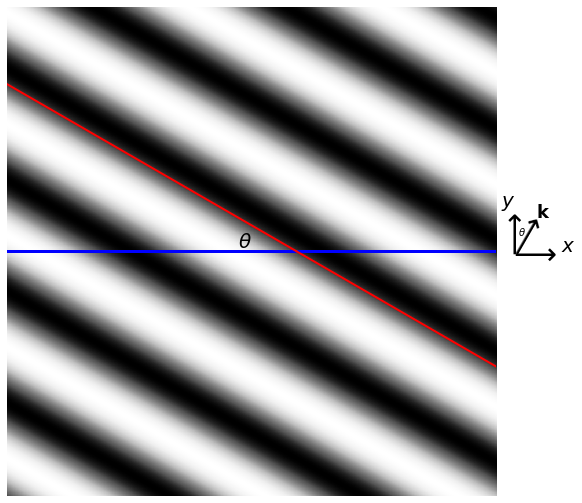

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(9.0, 9.0)

ax.imshow(z, extent=[-1.5, 1.1, -1.5, 1.1], cmap=plt.get_cmap('Greys'))
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

ax.plot([-1.1, 1.1], [0.0, 0.0], '-b', linewidth=3)
ax.plot([0.2, 0.2-2.*np.cos(theta_rad)],[0., 2.*np.sin(theta_rad)], '-r', linewidth=2)
ax.plot([0.2, 0.2+2.*np.cos(theta_rad)],[0., -2.*np.sin(theta_rad)],'-r', linewidth=2)

ax.text(0.0, 0.0, r'$\theta$', fontsize=20, ha='right', va='bottom')
ax.text(1.15, -0.05, r'$\longrightarrow$', fontsize=30)
ax.text(1.39, 0.0, r'$x$', fontsize=20)
ax.text(1.12, -0.015, r'$\longrightarrow$', fontsize=30, rotation=90)
ax.text(1.12, 0.2, r'$y$', fontsize=20)
ax.text(1.12, -0.045, r'$\longrightarrow$', fontsize=30, rotation=90-theta)
ax.text(1.28, 0.15, r'$\mathbf{k}$', fontsize=18)
ax.text(1.195, 0.07, r'$\theta$', fontsize=10)

ax.set_axis_off()
plt.show()

### Pure shear

The dispersion relation is

\begin{equation}
  \label{eq:pureshear-growthrate}
  \growrate = \pm 2\left(1-\por\zeroth\right)
  \frac{\porweaken\shearstrainrate}{\viscratio\zeroth}
  \frac{\left(2\pi\cmplength_0/\wavelength\right)^2}
  {1+\left(2\pi\cmplength_0/\wavelength\right)^2},
\end{equation}

Dispersion curves showing normalised growth rate of perturbations versus perturbation wavelength are plotted below on log-linear axes:

In [5]:
x = 2. * np.pi * np.logspace(-6.0, 4.0, 1000)
y = (2*np.pi/x)/(1.0+2.0*np.pi/x)

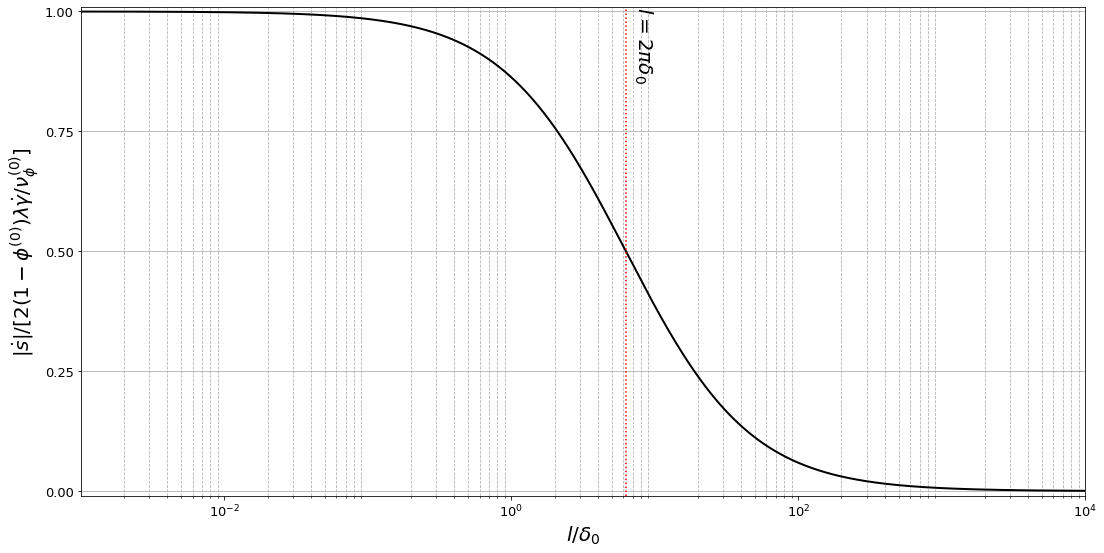

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(18.0, 9.0)

ax.semilogx(x, y, '-k', linewidth=2)
ax.set_xlim(1e-3, 1e4)
ax.set_ylim(-0.01, 1.01)

ax.plot([2*np.pi, 2*np.pi], [-0.01, 1.01], ':r')
ax.text(2*np.pi*1.1, 0.85, r'$l=2\pi\delta_{0}$', rotation=-90, va='bottom', fontsize=20)
ax.set_xlabel(r'$l/\delta_{0}$', fontsize=20)
ax.set_xticks((1e-2, 1e0, 1e2, 1e4))
plt.gca().xaxis.grid(True, which='minor', linestyle='--')
ax.set_ylabel(r'$\vert \dot{s}\vert/[2(1-\phi^{(0)})\lambda\dot{\gamma}/\nu^{(0)}_\phi]$', fontsize=20)
ax.set_yticks((0.0, 0.25, 0.5, 0.75, 1.0))
ax.tick_params(axis='both', which='major', labelsize=13)
plt.gca().yaxis.grid(True, which='major')
plt.show()

and on log-log axes:

In [7]:
x = 2. * np.pi * np.logspace(-6.0, 4.0, 1000)
y = (2.*np.pi/x)/(1.+2.*np.pi/x)

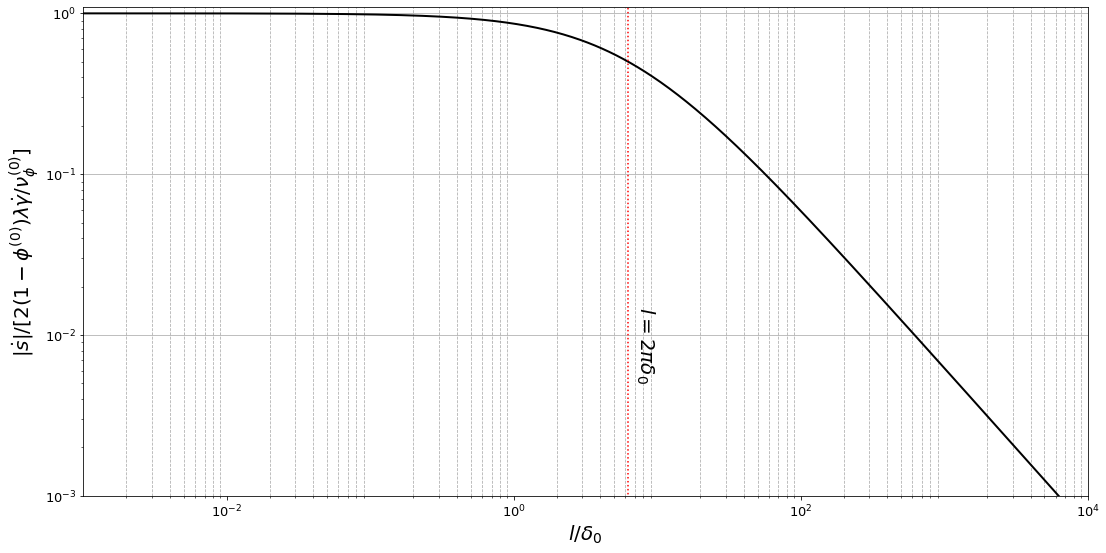

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(18.0, 9.0)

ax.loglog(x, y, '-k', linewidth=2)
ax.set_xlim(1e-3, 1e4)
ax.set_ylim(1e-3, 1.1)

ax.set_xlabel(r'$l/\delta_{0}$', fontsize=20)
ax.set_xticks((1e-2, 1e0, 1e2, 1e4))
plt.gca().xaxis.grid(True, which='minor', linestyle='--')
ax.set_ylabel(r'$\vert \dot{s}\vert/[2(1-\phi^{(0)})\lambda\dot{\gamma}/\nu^{(0)}_\phi]$', fontsize=20)
ax.set_yticks((1e-3, 1e-2, 1e-1, 1e0))
plt.gca().yaxis.grid(True, which='major')

ax.plot([2.*np.pi, 2.*np.pi], [1e-10, 10.0], ':r')
ax.text(2*np.pi*1.1, 0.005, r'$l=2\pi\delta_{0}$', rotation=-90, va='bottom', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=13)

plt.show()

### Simple shear

#### Porosity advection by the base-state

Schematic diagram normal to the shear plane showing a representative high-porosity band oriented at an angle $\bandangle$ with normal $\wavevector$. The band is being rotated to higher $\bandangle$ by the simple-shear flow.

In [9]:
th2 = 20.0

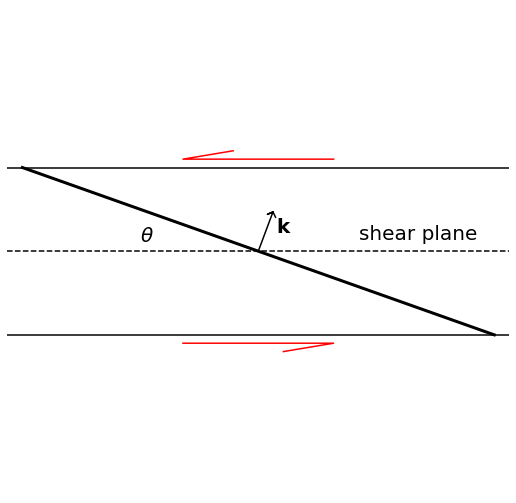

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(9.0, 9.0)

rot = -th2*np.pi/180.
M = np.asarray(((np.cos(rot), -np.sin(rot)), (np.sin(rot), np.cos(rot))))
aM = np.dot(M, np.asarray(((-1., 1.), (0.0, 0.0))))
ax.plot(aM[0, :], aM[1, :], '-k', linewidth=3)
ax.plot([-1., 1.], [-np.sin(rot), -np.sin(rot)], 'k')  # bottom line
ax.plot([-1., 1.], [0., 0.], '--k')  # middle line
ax.plot([-1., 1.], [np.sin(rot), np.sin(rot)], 'k')  # top line
ax.plot([-0.3, 0.3, 0.1], [1.1*np.sin(rot), 1.1*np.sin(rot), 1.2*np.sin(rot)], 'r')  # top red arrow
ax.plot([0.3, -0.3, -0.1], [-1.1*np.sin(rot), -1.1*np.sin(rot), -1.2*np.sin(rot)], 'r')  # bottom red arrow

al = 0.5 * np.abs(np.sin(rot))
ahl = 0.05 * np.abs(np.sin(rot))
av = np.zeros(5 * 2).reshape(2, 5)
av[0, :] = np.asarray((0., al, al-ahl, al, al-ahl))
av[1, :] = np.asarray((0., 0., ahl, 0., -ahl))
rot_90 = (90.-th2)*np.pi/180.
M = np.asarray(((np.cos(rot_90), -np.sin(rot_90)), (np.sin(rot_90), np.cos(rot_90))))
aM = np.dot(M, av)
ax.plot(aM[0, :], aM[1, :], '-k')
ax.text(aM[0, -1], aM[1, -1], r'$\mathbf{k}$', fontsize=20, va='top', ha='left')

ax.set_xlim(-1.0, 1.0)
ax.set_ylim(-1.0, 1.0)
ax.text(-0.5*np.abs(np.cos((180.-th2)*np.pi/180.)), 0.04, r'$\theta$', fontsize=20)
ax.text(0.4, 0.05, r'shear plane', fontsize=20)

ax.set_axis_off()
plt.show()

Figure above shows a wave-front with wavevector $\wavevector$ at time $t$. It makes an angle to the shear plane of
\begin{equation}
  \label{eq:simpleshear-bandangle}
  \bandangle(t) = \tan^{-1} \left( \frac{\wavenumber_{0x}}{\wavenumber_{0y} - \shearstrainrate\wavenumber_{0x}t} \right).
\end{equation}

A plot of band angle from equation \eqref{eq:simpleshear-bandangle} as a function of progressive shear strain (on the $y$-axis) is shown in below.

In [11]:
th0 = np.arange(5, 61, 5)*np.pi/180.
t = np.linspace(0., 3., 1000)
th = np.asarray([np.arctan2(np.sin(th0i), np.cos(th0i) - t*np.sin(th0i)) for th0i in th0])

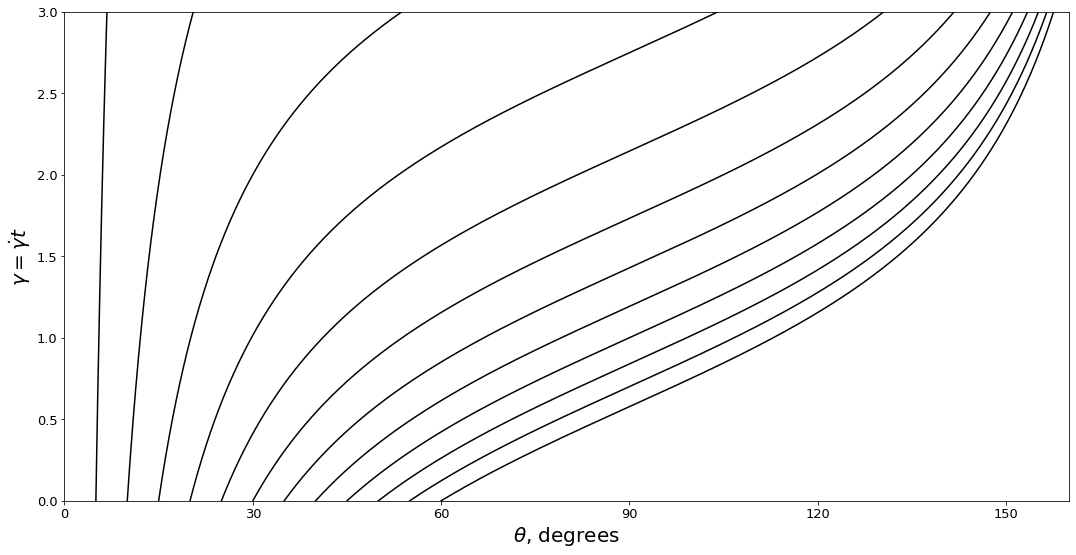

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(18.0, 9.0)

for th_ in th:
    ax.plot(th_*180/np.pi, t, '-k')
ax.set_xlim(0., 160.)
ax.set_ylim(0., 3.)
ax.set_xlabel(r'$\theta$, degrees', fontsize=20)
ax.set_xticks(np.arange(0.0, 150.1, 30.0))
ax.set_ylabel(r'$\gamma = \dot{\gamma}t$', fontsize=20)
ax.set_yticks((0.0, 0.5, 1, 1.5, 2, 2.5, 3))
ax.tick_params(axis='both', which='major', labelsize=13)

plt.show()

#### Growth of porosity bands when $\strrexp=1$

The growth rate can be written as
\begin{equation}
  \label{eq:simpleshear-growthrate-angle}
  \growrate = \left(1-\por\zeroth\right)
  \frac{\porweaken\shearstrainrate}{\viscratio\zeroth}
  \frac{(\cmplength_0\wavenumber)^2}
  {1 + (\cmplength_0\wavenumber)^2}\sin 2\bandangle.
\end{equation}

Figure below plots the normalised growth rate of small-wavelength ($\wavelength\ll\cmplength_0$) porosity bands under simple shear and Newtonian viscosity.

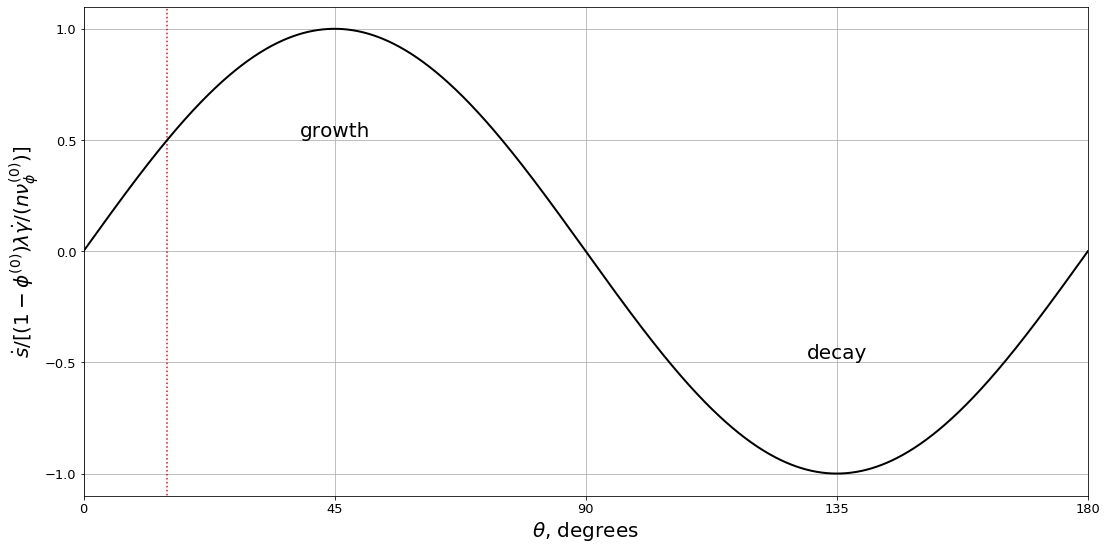

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(18.0, 9.0)

theta = np.linspace(0., np.pi, 1000)

ax.plot([15., 15.], [-2., 2.],':r')
ax.plot(theta*180./np.pi, np.sin(2.*theta), '-k', linewidth=2)
ax.set_xlim(0., 180.)
ax.set_ylim(-1.1, 1.1)

ax.set_xlabel(r'$\theta$, degrees', fontsize=20)
ax.set_xticks(np.arange(0.0, 180.1, 45.))
ax.set_ylabel(r'$\dot{s}/[(1-\phi^{(0)})\lambda\dot{\gamma}/(n\nu^{(0)}_\phi)]$', fontsize=20)
ax.set_yticks(np.arange(-1.0, 1.01, 0.5))
ax.text(45., 0.5, 'growth', fontsize=20, ha='center', va='bottom')
ax.text(135., -0.5, 'decay', fontsize=20, ha='center', va='bottom')
ax.tick_params(axis='both', which='major', labelsize=13)
plt.grid(True)
plt.show()

#### Growth of porosity bands when $\strrexp\ge1$

The growth rate can be written as
\begin{equation}
  \label{eq:simpleshear-nonnewt-growthrate}
  \growrate = \left(1-\por\zeroth\right)
  \frac{\porweaken\shearstrainrate}{\strrexp\viscratio\zeroth}
    \frac{\left(\cmplength_0k\right)^2}
    {1 + \left(\cmplength_0k\right)^2}
    \left(\frac{\sin2\theta}{1-\strrexpc\cos^22\theta}\right).
\end{equation}

Figure below plots the normalised growth rate of small-wavelength ($\wavelength\ll\cmplength_0$) porosity bands under simple shear and non-Newtonian viscosity with various values of $\strrexp$. The vertical dotted lines mark $\theta=15^\circ$.

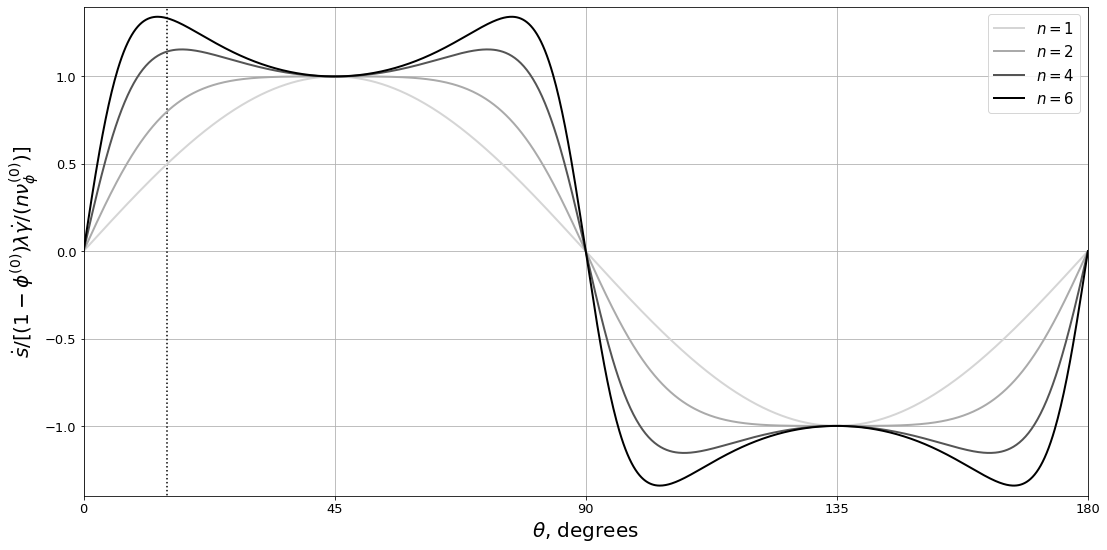

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(18.0, 9.0)

ax.plot([15., 15.], [-2., 2.], ':k')
n = np.asarray((1, 2, 4, 6))
theta = np.linspace(0., np.pi, 1000)
for i in n:
    N = (i-1)/i
    colr = [1.0-i/np.amax(n), 1.-i/np.amax(n), 1.-i/np.amax(n)]
    ax.plot(theta*180./np.pi, np.sin(2.*theta)/(1.-N*np.cos(2.*theta)**2), '-k', 
            linewidth=2, label=r'$n='+str(i)+'$', color=colr)

ax.set_xlim(0., 180.)
ax.set_ylim(-1.4, 1.4)
ax.set_xlabel(r'$\theta$, degrees', fontsize=20)
ax.set_xticks(np.arange(0.0, 180.1, 45.))
ax.set_ylabel(r'$\dot{s}/[(1-\phi^{(0)})\lambda\dot{\gamma}/(n\nu^{(0)}_\phi)]$', fontsize=20)
ax.set_yticks(np.arange(-1.0, 1.01, 0.5))
ax.legend(fontsize=15, loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=13)
plt.grid(True)
plt.show()

#### Extending the analysis to finite strain

Restricting our focus to the case of wavelengths much smaller than the compaction length, we can obtain $s$ by integrating
\begin{equation}
  \label{eq:simpleshear-perturbation-amplitude}
  s(\bandangle,t) =
  \left(1-\por\zeroth\right)
  \frac{\porweaken\shearstrainrate}{\strrexp\viscratio\zeroth}\int_0^t
  \left(\frac{\sin2\theta(t')}{1-\strrexpc\cos^22\theta(t')}\right)\infd t',
\end{equation}
where $t'$ is a dummy variable of integration, to distinguish it from the (variable) upper limit of integration, $t$.

Figure below plots the amplitude of porosity perturbations $\e^{\growamp(t)}$ as a function of angle and strain $\gamma=\shearstrainrate t$. Dotted curves are passive advection trajectories from eqn. \eqref{eq:simpleshear-bandangle} with Newtonian viscosity ($\strrexp=1,\,\strrexpc=0$).

In [15]:
ncontours = 20

N = 600
tmax = 3.3
th0 = np.linspace(0., 135.*np.pi/180., N, endpoint=True)
t = np.linspace(0., tmax, N)
theta = np.asarray([np.arctan2(np.sin(th0i), np.cos(th0i) - t*np.sin(th0i)) for th0i in th0])
amp = np.asarray([integrate.cumtrapz(np.sin(2.*th), t, initial=0) for th in theta])

THETA, T = np.meshgrid(th0, t)

tt = np.tile(t, N)
exp_amp = np.exp(amp)
F = griddata((theta.reshape(N*N), tt), exp_amp.reshape(N*N), (THETA.reshape(N*N), T.reshape(N*N)))
A = np.exp(F).reshape(N, N)
A = np.asarray([a/np.max(a) for a in A])
                                                   
convec = np.linspace(0.05, 0.95, 10, endpoint=True)
convecB = np.linspace(0.05, 0.95, 4, endpoint=True)
convec = np.setdiff1d(convec, convecB)

th0_ = np.concatenate((np.arange(2, 45, 4), np.arange(49, 135, 8)), axis=0)*np.pi/180.
th_ = np.asarray([np.arctan2(np.sin(th0i), (np.cos(th0i) - t*np.sin(th0i))) for th0i in th0_])

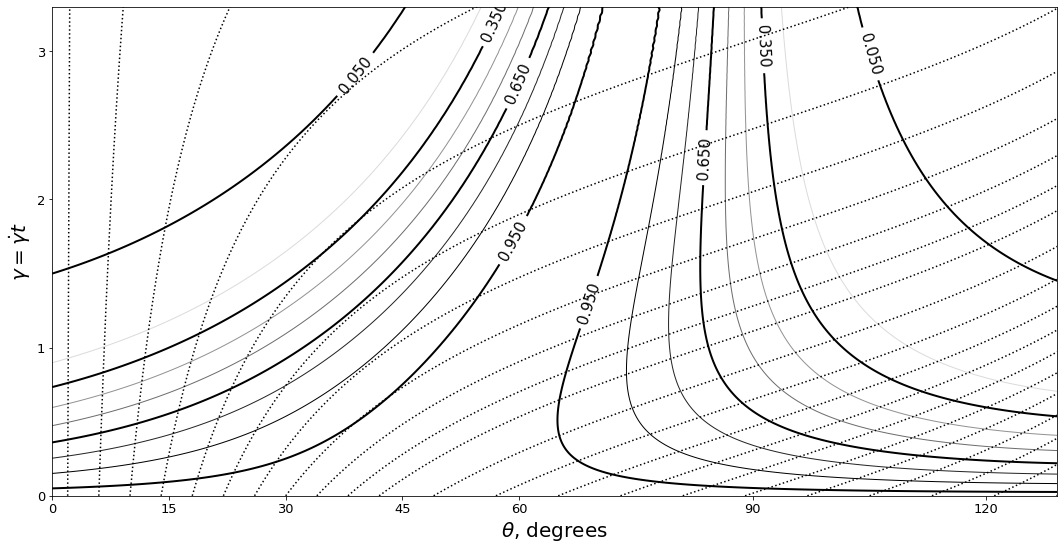

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(18.0, 9.0)

CS = ax.contour(th0*180./np.pi, t, A, convec, cmap=plt.cm.binary, linewidths=1)
CSB = ax.contour(th0*180./np.pi, t, A, convecB, colors='k', linewidths=2)
ax.clabel(CSB, inline=1, fontsize=15)

for thi in th_:
    ax.plot(thi*180./np.pi, t, ':k')
ax.set_xlabel(r'$\theta$, degrees', fontsize=20)
ax.set_ylabel(r'$\gamma=\dot{\gamma}t$', fontsize=20)
ax.set_xlim(0., np.amax(th0_)*180./np.pi)
ax.set_ylim(0., np.amax(t))
ax.set_xticks((0, 15, 30, 45, 60, 90, 120))
ax.set_yticks((0, 1, 2, 3))
ax.tick_params(axis='both', which='major', labelsize=13)
plt.show()

Figure below also plots the amplitude of porosity perturbations $\e^{\growamp(t)}$ as a function of angle and strain $\gamma=\shearstrainrate t$, but the dotted curves are passive advection trajectories consider Non-Newtonian viscosity ($\strrexp=6,\,\strrexpc=5/6$).

In [17]:
eps = 2.2204e-16
n = 6.
N = 600
tmax = 3.3
dpts = np.asarray([0., 5., 20., 135.])*np.pi/180.
th0 = np.linspace(dpts[0], dpts[1], N/4)
th0 = np.concatenate((th0, np.linspace(dpts[1] + eps, dpts[2], N/2)), axis=0)
th0 = np.concatenate((th0, np.linspace(dpts[2] + eps, dpts[3], N/4)), axis=0)
assert th0.shape[0] == N, 'th0 was wrongly calculated'

t = np.linspace(0., tmax, N)
nf = (1.-n)/n

theta = np.asarray([np.arctan2(np.sin(th0i), np.cos(th0i) - t*np.sin(th0i)) for th0i in th0])
amp = np.asarray([integrate.cumtrapz(np.sin(2.*th)/(1+nf*np.cos(2.*th)**2), t, initial=0) for th in theta])

THETA, T = np.meshgrid(th0, t)

tt = np.tile(t, N)
exp_amp = np.exp(amp)
F = griddata((theta.reshape(N*N), tt), exp_amp.reshape(N*N), (THETA.reshape(N*N), T.reshape(N*N)))
A = np.exp(F).reshape(N, N)
A = np.asarray([a/np.max(a) for a in A])

convec = np.linspace(0.05, 0.95, 10, endpoint=True)
convecB = np.linspace(0.05, 0.95, 4, endpoint=True)
convec = np.setdiff1d(convec, convecB)

th0_ = np.concatenate((np.arange(2, 45, 4), np.arange(49, 135, 8)), axis=0)*np.pi/180.
th = np.asarray([np.arctan2(np.sin(th0i), np.cos(th0i) - t*np.sin(th0i)) for th0i in th0_])

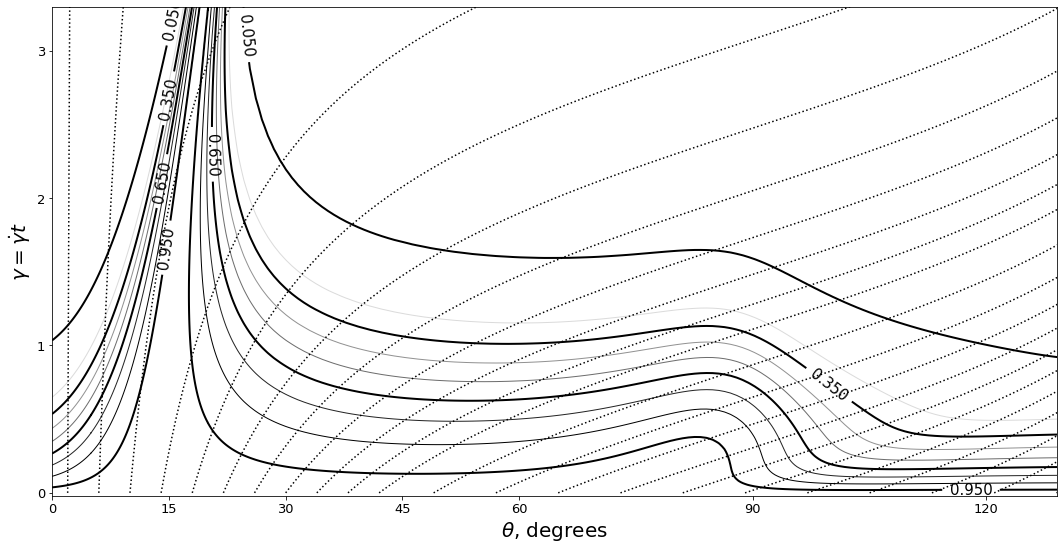

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(18.0, 9.0)

CS = ax.contour(th0*180./np.pi, t, A, convec, cmap=plt.cm.binary, linewidths=1.0)
CSB = ax.contour(th0*180./np.pi, t, A, convecB, colors='k', linewidths=2)
ax.clabel(CSB, inline=1, fontsize=15)

for thi in th_:
    ax.plot(thi*180./np.pi, t, ':k')

ax.set_xlabel(r'$\theta$, degrees', fontsize=20)
ax.set_ylabel(r'$\gamma=\dot{\gamma}t$', fontsize=20)
ax.set_xlim(0., np.amax(th0_)*180./np.pi)
ax.set_ylim(-0.02, np.amax(t))
ax.set_xticks((0, 15, 30, 45, 60, 90, 120))
ax.set_yticks((0, 1, 2, 3))
ax.tick_params(axis='both', which='major', labelsize=13)

plt.show()

## Wavelength selection by surface tension

The growth rate of porosity bands versus wavelength is given by
\begin{equation}
  \label{eq:porband-sfcten-growrate-wavenum}
  \growrate_* = \frac{\wavenumber_*^2\left(1-\sfctenvshear\,\wavenumber_*^2\right)}
  {\wavenumber_*^2+1}.
\end{equation}
Increasing values of $\sfctenvshear$ represent an increasing strength of surface-tension driven segregation. Figure below plots \eqref{eq:porband-sfcten-growrate-wavenum} in log-linear scale.

In [19]:
k = np.logspace(-2, 3, 10000)
Rb = np.asarray([0., 0.0001, 0.001, 0.01])
sd = np.asarray([k**2.*(1. - Rbi*k**2)/(k**2+1.) for Rbi in Rb])
l_on_d = 2*np.pi/k

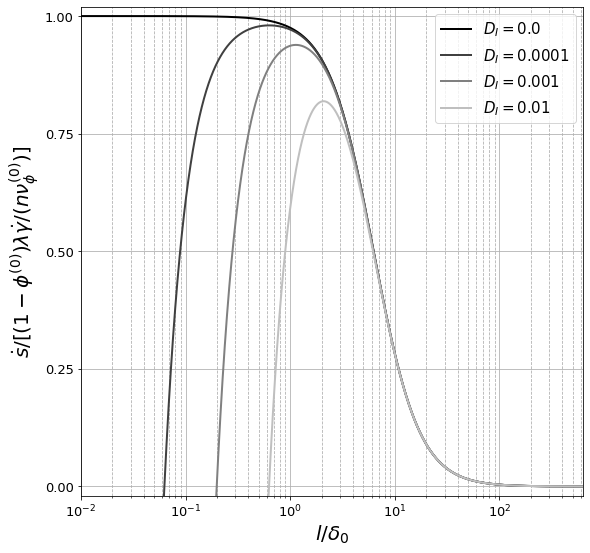

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(9.0, 9.0)

for i in np.arange(len(Rb)):
    colr = 1.-(len(Rb) - i)/len(Rb)*np.asarray([1, 1, 1])
    ax.semilogx(l_on_d, sd[i, :], '-', linewidth=2, color=colr, label=f'$D_I={str(Rb[i])}$')

ax.set_xlabel(r'$l/\delta_{0}$', fontsize=20)
ax.set_xticks(np.power(10., np.arange(-2.0, 2.1, 1.)))
ax.set_xlim(1e-2, np.power(10, 2.8))
plt.gca().xaxis.grid(True, which='minor', linestyle='--')
ax.set_ylabel(r'$\dot{s}/[(1-\phi^{(0)})\lambda\dot{\gamma}/(n\nu^{(0)}_\phi)]$', fontsize=20)
ax.set_yticks(np.arange(0., 1.01, 0.25))
ax.set_ylim(-0.02, 1.02)
ax.legend(fontsize=15, loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=13)
plt.grid(True)
plt.show()

Figure below plots \eqref{eq:porband-sfcten-growrate-wavenum} in the log-log scale.

In [21]:
k = np.logspace(-2,3,10000)
Rb = np.asarray([0., 0.0001, 0.001, 0.01])
sd = np.asarray([k**2.*(1. - Rbi*k**2)/(k**2+1.) for Rbi in Rb])
l_on_d = 2*np.pi/k

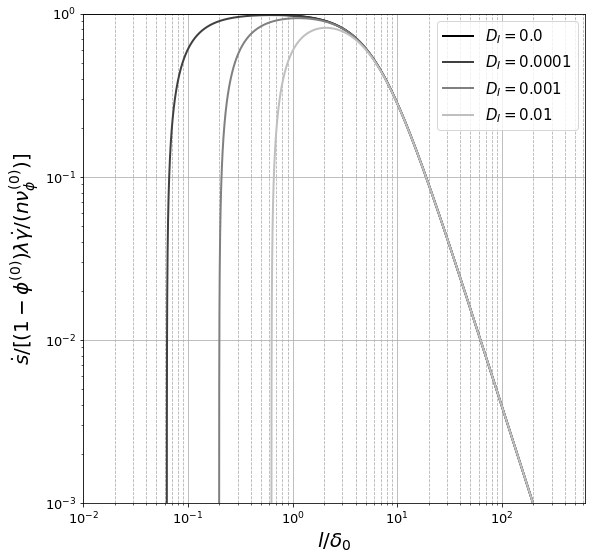

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(9.0, 9.0)

for i in np.arange(len(Rb)):
    colr = 1.-(len(Rb) - i)/len(Rb)*np.asarray([1, 1, 1])
    ax.loglog(l_on_d, sd[i, :], '-', linewidth=2, color=colr, label=f'$D_I={str(Rb[i])}$')

ax.set_xlabel(r'$l/\delta_{0}$', fontsize=20)
ax.set_xticks(np.power(10., np.arange(-2.0, 2.1, 1.)))
ax.set_xlim(1e-2, np.power(10, 2.8))
plt.gca().xaxis.grid(True, which='minor', linestyle='--')

ax.set_ylabel(r'$\dot{s}/[(1-\phi^{(0)})\lambda\dot{\gamma}/(n\nu^{(0)}_\phi)]$', fontsize=20)
ax.set_yticks(np.power(10., np.arange(-3, 0.1, 1)))
ax.set_ylim(1e-3, 1e0)
ax.legend(fontsize=15, loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=13)
plt.grid(True)
plt.show()

The characteristics of the dominant perturbation as a function of $\sfctenvshear$ is plotted below for the wavelength with the largest growth rate $l^\text{max}/\delta_0$.

In [23]:
Rb = np.logspace(-5., 1., 10000)
ks = np.sqrt((np.sqrt(Rb+1.) - np.sqrt(Rb))/np.sqrt(Rb))
l = 2. * np.pi/ks

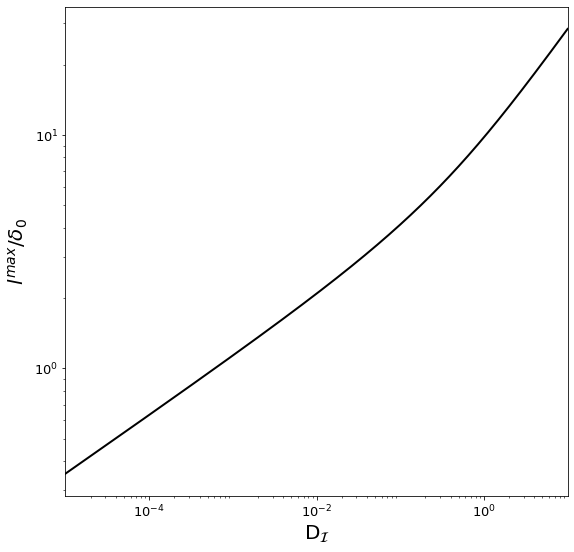

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(9.0, 9.0)

ax.loglog(Rb, l, '-k', linewidth=2)
ax.set_xlabel(r'D$_\mathcal{I}$', fontsize=20)
ax.set_xlim(1e-5, 1e1)
ax.set_xticks(np.power(10., np.arange(-4, 1, 2)))
ax.set_ylabel(r'$l^{max}/\delta_{0}$', fontsize=20)
ax.set_yticks((1e0, 1e1))
ax.tick_params(axis='both', which='major', labelsize=13)

plt.show()

And below for the growth rate of the dominant perturbation $s_*^\text{max}$.

In [25]:
Rb = np.logspace(-5., 1., 10000)
ks = np.sqrt((np.sqrt(Rb+1.) - np.sqrt(Rb))/np.sqrt(Rb))
s = ks**2. * (1. - Rb*ks**2)/(ks**2. + 1.)

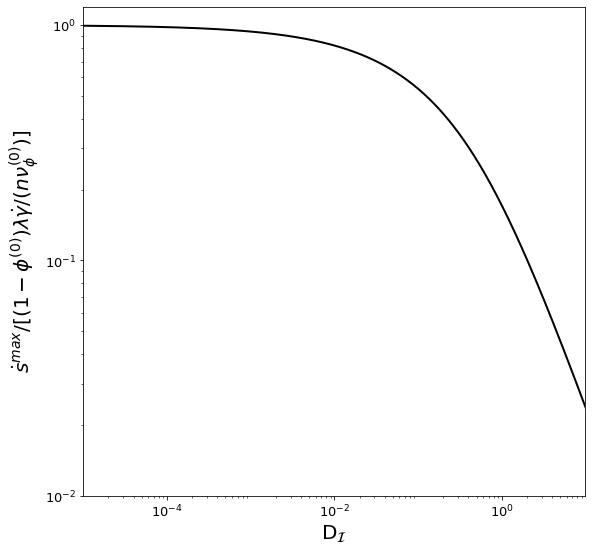

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(9.0, 9.0)

ax.loglog(Rb, s, '-k', linewidth=2)
ax.set_xlim(1e-5, 1e1)
ax.set_xticks(np.power(10., np.arange(-4., 1., 2)))
ax.set_yticks([1e-2, 1e-1, 1e0])
ax.set_xlabel(r'D$_\mathcal{I}$', fontsize=20)
ax.set_ylabel(r'$\dot{s}^{max}/[(1-\phi^{(0)})\lambda\dot{\gamma}/(n\nu^{(0)}_\phi)]$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=13)

plt.show()